<a href="https://colab.research.google.com/github/Ryu4824/ds-section1-sprint2-new/blob/main/n122-Central-Limit-Theorem/n122a%20-%20CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 2 / NOTE 2*

# 📝 Assignment

# **🌱 기본 과제**

## **Part 1. 데이터셋 불러오기**

- 서울시 기간별 시간평균 대기환경 정보 데이터셋을 불러오세요. 
  - 다음 [링크](https://data.seoul.go.kr/dataList/OA-2221/S/1/datasetView.do)에서 `2020년 3월`의 데이터셋을 다운받으세요. 
- 불러온 데이터셋을 변수 `data`에 저장하세요.
  - 한글 데이터이므로 `encoding` 파라미터 설정이 필요합니다. 
  - `측정일시`, `측정소명`, `오존(ppm)` column만 사용합니다. column을 추출하는 방법은 여러 가지가 있는데, 이번에는 `usecols` 파라미터를 한번 사용해 보세요. 
- `data`에서 `측정소명`이 **`송파구`**인 데이터를 추출하여 `df`에 저장하세요. 
- `df`의 index를 재설정 하세요.

In [31]:
import pandas as pd
import numpy as np
from google.colab import files
upload = files.upload()

Saving 서울시_기간별_시간평균_대기환경_정보_2020.03.csv to 서울시_기간별_시간평균_대기환경_정보_2020.03.csv


In [243]:
data = pd.read_csv('서울시_기간별_시간평균_대기환경_정보_2020.03.csv', encoding='CP949')

In [244]:
data

,측정일시,권역코드,권역명,측정소코드,측정소명,미세먼지 1시간(㎍/㎥),미세먼지 24시간(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
0,202003312300,100,도심권,111123,종로구,47,48,22,0.036,0.018,0.4,0.004
1,202003312300,100,도심권,111131,용산구,55,52,21,0.024,0.033,0.5,0.003
2,202003312300,100,도심권,111121,중구,43,43,24,0.034,0.020,0.4,0.003
3,202003312300,101,서북권,111181,은평구,51,54,18,0.047,0.010,0.3,0.003
4,202003312300,101,서북권,111191,서대문구,58,57,21,0.047,0.012,0.6,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...
18595,202003010000,103,서남권,111231,영등포구,33,29,23,0.002,0.050,0.8,0.003
18596,202003010000,104,동남권,111261,강남구,26,25,19,0.008,0.046,0.7,0.002
18597,202003010000,104,동남권,111262,서초구,46,35,27,0.007,0.054,0.5,0.003
18598,202003010000,104,동남권,111274,강동구,36,31,22,0.002,0.043,0.6,0.002


##### **Q1. `df`의 row는 모두 몇 개인지 쓰세요.**

In [245]:
df=data[data['측정소명'] == '송파구']
df=df.reset_index(drop=True)
df

,측정일시,권역코드,권역명,측정소코드,측정소명,미세먼지 1시간(㎍/㎥),미세먼지 24시간(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
0,202003312300,104,동남권,111273,송파구,49,47,23,0.020,0.044,0.5,0.004
1,202003312200,104,동남권,111273,송파구,41,48,19,0.021,0.045,0.6,0.004
2,202003312100,104,동남권,111273,송파구,42,50,17,0.025,0.042,0.6,0.004
3,202003312000,104,동남권,111273,송파구,43,54,18,0.032,0.040,0.5,0.004
4,202003311900,104,동남권,111273,송파구,52,55,22,0.034,0.045,0.5,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...
739,202003010400,104,동남권,111273,송파구,30,30,21,0.002,0.039,1.2,0.002
740,202003010300,104,동남권,111273,송파구,31,30,20,0.002,0.040,1.2,0.002
741,202003010200,104,동남권,111273,송파구,29,30,21,0.002,0.042,1.1,0.002
742,202003010100,104,동남권,111273,송파구,30,30,20,0.002,0.042,1.1,0.002


## **Part 2. 큰 수의 법칙**

표본 크기가 커질수록 표본평균이 모평균에 가까워지는 것을 확인합니다. 

### **2-1. 모평균**
- `df['오존(ppm)']`을 추출하여 변수 `pop`에 저장합니다. 우리는 `pop`을 모집단이라 가정한 뒤 분석을 진행합니다. 
- 모평균을 `pop_mean`에 저장하세요. 

##### **Q2. 모평균을 반올림하여 소수점 둘째 자리까지 쓰세요.**

In [246]:
pop = df['오존(ppm)']
pop_mean = pop.mean()
round(pop_mean,2)

0.02

### **2-2. 표본 크기에 따른 표본 평균**
- 모집단에서 10개의 데이터를 추출하여 평균을 `sample_10_mean`에 저장하세요.
- 모집단에서 200개의 데이터를 추출하여 평균을 `sample_200_mean`에 저장하세요. 
- 데이터를 추출할 때, [`.sample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) 함수를 활용하세요. 
  - `random_state=2`로 설정합니다. 
  - 중복 추출을 허용합니다. 

##### **Q3. 모평균과 표본 크기가 10인 표본의 평균의 차의 절댓값을 $a$, 모평균과 표본 크기가 200인 표본의 평균의 차의 절댓값을 $b$라 할 때, $a \over b$의 값을 반올림하여 소수점 둘째 자리까지 구하세요.**

In [247]:
sample_10 = pop.sample(10,random_state=2,replace=True)
sample_10_mean = sample_10.mean()

In [248]:
sample_200 = pop.sample(200,random_state=2,replace=True)
sample_200_mean = sample_200.mean()

In [249]:
round((abs(pop_mean-sample_10_mean) / abs(pop_mean-sample_200_mean)),2)

13.75

### **2-3. 시각화**
- 다음 시각화를 구현하세요.  <br>
  <img src = 'https://i.imgur.com/cC8DaP1.png'>

##### **Q4. 주어진 시각화와 같이 히스토그램을 나타내려고 합니다. `plt.hist()`를 활용할 때, `()`안에 들어갈 인자는 무엇일까요?**
- 모집단의 데이터 분포
- 표본 크기가 10인 표본의 데이터 분포
- 표본 크기가 200인 표본의 데이터 분포 
- 표본 크기가 10인 표본의 평균의 분포
- 표본 크기가 200인 표본의 평균의 분포 

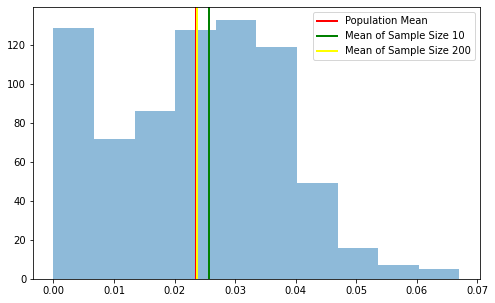

In [250]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.hist(pop, alpha=0.5)
plt.axvline(pop_mean, c='red', lw=2, label='Population Mean')
plt.axvline(sample_10_mean, c='green', lw=2, label='Mean of Sample Size 10')
plt.axvline(sample_200_mean, c='yellow', lw=2, label='Mean of Sample Size 200')
plt.legend();

## **Part 3. 중심극한정리**

표본들의 평균 분포가 정규분포를 이루는지 다음 순서에 따라 확인합니다.  

1. numpy의 `random.choice()` 함수를 활용하여 `df['오존(ppm)']`에서 20개의 데이터를 추출합니다.
  - 중복 추출을 허용합니다. 
2. 20개의 데이터의 평균을 계산하여 리스트 `s1`에 저장합니다. 
3. 1~2 과정을 `for loop`을 이용하여 10,000번 반복합니다. 즉, `s1`에는 10,000번 추출된 20개의 데이터의 평균값이 저장됩니다. 
4. 평균값들의 분포를 `seaborn.kdeplot()`을 활용하여 시각화 하세요. <br>
  https://seaborn.pydata.org/generated/seaborn.kdeplot.html

##### **Q5. 평균 값들의 분포를 시각화한 결과는 어떤 모습일까요?**

In [251]:
np.random.seed(1)
sample=np.random.choice(pop,20,replace=True)
sample

array([0.023, 0.037, 0.023, 0.038, 0.033, 0.011, 0.056, 0.038, 0.016,
       0.036, 0.007, 0.037, 0.018, 0.024, 0.022, 0.017, 0.033, 0.031,
       0.038, 0.02 ])

In [252]:
s1 = []
s1.append(sample.mean())
s1

[0.0279]

In [253]:
np.random.seed(1)
s1 = []
for i in range(10000):
  sample=np.random.choice(pop,20,replace=True)
  s1.append(sample.mean())

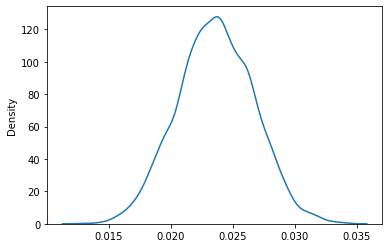

In [254]:
import seaborn as sns
sns.kdeplot(s1)

## **Part 4. 신뢰구간**
**Part 3** 에서 빌드한 표본 평균 분포에 대하여 모집단의 모수를 포함할 확률이 95%가 되는 구간을 시각화합니다. 
- 표본 평균의 평균은 초록 세로선으로, 신뢰구간 95% 구간은 빨간 세로선으로 나타내세요. 

##### **Q6. 95% 신뢰구간을 시각화한 결과는 어떤 모습일까요?**

In [255]:
s1 = np.array(s1)
s1_mean = s1.mean()
s1_mean

0.023614205000000003

In [256]:
lower, upper = round(np.percentile(s1, 2.5),4), round(np.percentile(s1, 97.5),4)
lower,upper

(0.0176, 0.0296)

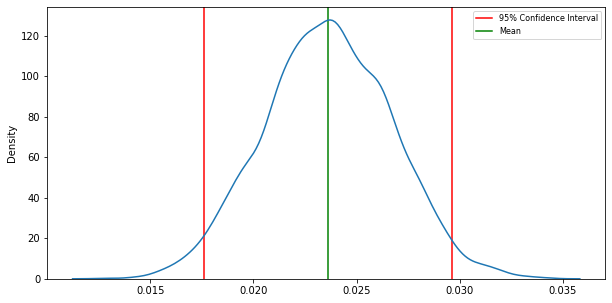

In [257]:
plt.figure(figsize=(10,5))
plt.axvline(lower, c='red', label='95% Confidence Interval')
plt.axvline(upper, c='red')
plt.axvline(s1_mean, c='green', label='Mean')
plt.legend(fontsize=8)
sns.kdeplot(data=s1)

# **🥇 도전 과제**

> 2번에서 구한 두 표본 sample_10, sample_200을 계속 사용합니다.

</br>

- 한 표본의 신뢰구간을 수학적으로 다음 식과 같이 나타낼 수 있습니다. 
  > $\bar{x} ± t \cdot {s\over \sqrt{n}}$
  - $\bar{x}$ : 표본의 평균
  - $t$ : t-value <br>
    - [stats.t.ppf()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html) 메소드를 활용해 구할 수 있습니다. 신뢰도(confidence level)는 95%로 합니다. 
    - 다음 [stackoverflow](https://stackoverflow.com/questions/67340028/how-to-use-t-ppf-which-are-the-arguments)를 참고하세요. 
  - $s$ : 표본의 표준편차
  - $n$ : 데이터 수 

- **신뢰구간 식과 `plt.bar()`를 사용하여 다음과 같은 신뢰구간 시각화를 그리세요.**

  <img src = 'https://i.imgur.com/MpDSFtn.png'>

- **위의 시각화로부터 도출할 수 있는 insight를 설명해 보세요.** 

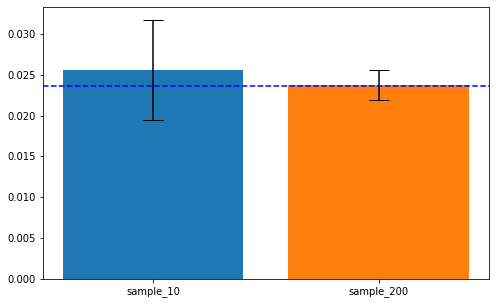

In [342]:
from scipy.stats import t
import math

upper_10=sample_10_mean + (t.ppf(0.975, len(sample_10)-1) * (sample_10.std()/math.sqrt(len(sample_10))))
lower_10=sample_10_mean - (t.ppf(0.975, len(sample_10)-1) * (sample_10.std()/math.sqrt(len(sample_10))))

upper_200=sample_200_mean + (t.ppf(0.975, len(sample_200)-1) * (sample_200.std()/math.sqrt(len(sample_200))))
lower_200=sample_200_mean - (t.ppf(0.975, len(sample_200)-1) * (sample_200.std()/math.sqrt(len(sample_200))))

plt.figure(figsize = (8,5))
plt.bar('sample_10', sample_10_mean, yerr = ((upper_10 - lower_10)/2), capsize = 10)
plt.bar('sample_200', sample_200_mean, yerr = ((upper_200 - lower_200)/2), capsize = 10)
plt.axhline(y=pop_mean, color='blue', linestyle='--')